In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Project client: ABC Bank. They have a data file that has over 300k loans they have issued.

In [70]:
df_loans = pd.read_csv('application_train.csv')
pd.set_option('display.max_columns', None) 

In [71]:
original_loans = pd.read_csv('application_train.csv')

## 1. Cleanse (handle nulls)

#### We see AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, OWN_CAR_AGE, OCCUPATION_TYPE, CNT_FAM_MEMBERS have nulls

In [72]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   Unnamed: 1                   0 non-null       float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [73]:
df_loans.head()

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,NaN,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,NaN,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,NaN,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,NaN,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,NaN,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0


#### drop unnamed column

In [74]:
df_loans.drop('Unnamed: 1', axis=1, inplace=True)

#### AMT_ANNUITY: assume this mean the montly paying amount

In [75]:
df_loans[df_loans['AMT_ANNUITY'].isnull() == True]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
47531,155054,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,-4946.0,-3238,NaN,1,1,1,1,1,0,High skill tech staff,1.0,0,0,0,0,0,0,Business Entity Type 3,0
50035,157917,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,-3640.0,-741,NaN,1,1,1,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 1,0
51594,159744,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,-11524.0,-831,NaN,1,1,0,1,0,0,Cooking staff,2.0,0,0,0,1,1,1,Self-employed,0
55025,163757,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,-11329,-2040,-3195.0,-3069,NaN,1,1,0,1,0,0,Core staff,2.0,0,0,0,1,1,1,Government,0
59934,169487,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,-11285.0,-3305,4.0,1,1,1,1,1,0,Laborers,1.0,0,1,1,0,1,1,Other,0
75873,187985,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,-771.0,-4203,8.0,1,1,0,1,0,0,Drivers,1.0,0,0,0,0,0,0,Business Entity Type 3,0
89343,203726,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,-858.0,-591,2.0,1,1,0,1,1,0,Medicine staff,2.0,0,0,0,0,0,0,Medicine,0
123872,243648,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,-168.0,-4250,NaN,1,1,0,1,0,1,Secretaries,2.0,0,0,0,0,0,0,Self-employed,0
207186,340147,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-10151,-472,-10127.0,-2787,NaN,1,1,0,1,1,0,Security staff,2.0,1,1,1,1,1,1,Security,0
227939,364022,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Unaccompanied,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,-482.0,-4192,NaN,1,1,0,1,0,0,Sales staff,2.0,0,1,1,0,0,0,Business Entity Type 3,0


#### It is hard to tell what the proper annuity amount should be, and since it is only 12 records, I decide to drop them to remove nulls.

In [76]:
# didn't have inplace true and didn't work at first
df_loans.drop(df_loans[df_loans['AMT_ANNUITY'].isnull() == True].index, inplace=True)

#### AMT_GOODS_PRICE: I decide to fill empty AMT_GOODS_PRICE price =  AMT_ANNUITY + (AMT_CREDIT - AMT_ANNUITY)/2, since the AMT_GOODS_PRICE can not be higher than credit and won't be lower than annuity, I choose a middle number in between

In [77]:
df_loans['AMT_GOODS_PRICE'] = df_loans['AMT_GOODS_PRICE'].fillna(df_loans['AMT_ANNUITY'] + (df_loans['AMT_CREDIT'] - df_loans['AMT_ANNUITY'])/2)

In [78]:
df_loans[df_loans['AMT_GOODS_PRICE'].isnull() == True]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET


#### NAME_TYPE_SUITE: I decide to mark the null ones as type Unaccompanied

In [79]:
df_loans['NAME_TYPE_SUITE'] = df_loans['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [80]:
df_loans[df_loans['NAME_TYPE_SUITE'].isnull() == True]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET


#### OWN_CAR_AGE: I see some customers have OWN_CAR_AGE as 0, which means their car has 0 years of age, assuming NaN value probably means the customers have no cars, assigning 0 years of age to them make sense.

In [81]:
df_loans['OWN_CAR_AGE'] = df_loans['OWN_CAR_AGE'].fillna(0)

In [82]:
df_loans[df_loans['OWN_CAR_AGE'].isnull() == True]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET


#### OCCUPATION_TYPE: not too sure how to handle this because there are 96391 NaN records, so I decide to create a new category 'Unknown'. The bank can and should slowly update the Unknown occupation type going forward to have better data quality.

In [83]:
df_loans[df_loans['OCCUPATION_TYPE'].isnull() == True]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,-7427.0,-3514,0.0,1,0,0,1,0,0,NaN,2.0,0,0,0,0,0,0,XNA,0
11,100015,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246.0,-2512,0.0,1,0,0,1,1,0,NaN,2.0,0,0,0,0,0,0,XNA,0
23,100027,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,-9012.0,-3684,0.0,1,0,0,1,1,0,NaN,2.0,0,0,0,0,0,0,XNA,0
28,100033,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,-9994,-1796,-4668.0,-2661,1.0,1,1,0,1,0,1,NaN,1.0,0,1,1,0,0,0,Military,0
30,100035,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-15280,-2668,-5266.0,-3787,0.0,1,1,0,1,0,1,NaN,2.0,0,0,0,0,0,0,Business Entity Type 3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,-16010,-1185,-5034.0,-4392,9.0,1,1,0,1,1,0,NaN,3.0,0,0,0,0,0,0,Business Entity Type 2,0
307487,456231,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,-5485.0,-4115,0.0,1,0,0,1,0,0,NaN,2.0,0,0,0,0,0,0,XNA,0
307500,456244,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,0.0,1,1,0,1,0,1,NaN,2.0,0,0,0,0,0,0,Business Entity Type 3,0
307505,456249,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,-7369.0,-2357,0.0,1,0,0,1,1,0,NaN,1.0,0,0,0,0,0,0,XNA,0


In [84]:
df_loans['OCCUPATION_TYPE'] = df_loans['OCCUPATION_TYPE'].fillna('Unknown')

#### CNT_FAM_MEMBERS: there is only 2 records and their family status are unknown and no children, so I think it's safe to assign count of family number as 0

In [85]:
df_loans[df_loans['CNT_FAM_MEMBERS'].isnull() == True]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
41982,148605,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,354375.0,Unaccompanied,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,-1161,-3265.0,-4489,0.0,1,1,1,1,1,0,Managers,NaN,0,1,1,0,1,1,Insurance,0
187348,317181,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,307125.0,Unaccompanied,Commercial associate,Higher education,Unknown,House / apartment,-12844,-232,-1597.0,-1571,0.0,1,1,0,1,0,0,Accountants,NaN,0,0,0,0,0,0,Business Entity Type 2,0


In [86]:
df_loans['CNT_FAM_MEMBERS'] = df_loans['CNT_FAM_MEMBERS'].fillna(0)

#### final result after cleaning (removing nulls)

In [87]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307499 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307499 non-null  int64  
 1   NAME_CONTRACT_TYPE           307499 non-null  object 
 2   CODE_GENDER                  307499 non-null  object 
 3   FLAG_OWN_CAR                 307499 non-null  object 
 4   FLAG_OWN_REALTY              307499 non-null  object 
 5   CNT_CHILDREN                 307499 non-null  int64  
 6   AMT_INCOME_TOTAL             307499 non-null  float64
 7   AMT_CREDIT                   307499 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307499 non-null  float64
 10  NAME_TYPE_SUITE              307499 non-null  object 
 11  NAME_INCOME_TYPE             307499 non-null  object 
 12  NAME_EDUCATION_TYPE          307499 non-null  object 
 13  NAME

In [88]:
df_loans.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
count,307499.000000,307499.000000,3.074990e+05,3.074990e+05,307499.000000,3.074990e+05,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000
mean,278181.934868,0.417068,1.687972e+05,5.990273e+05,27108.573909,5.380433e+05,-16037.054212,63817.623992,-4986.109490,-2994.212498,4.101994,0.999997,0.819882,0.199363,0.998133,0.281058,0.056719,2.152667,0.015142,0.050758,0.040647,0.078166,0.230446,0.179545,0.080732
std,102790.364944,0.722131,2.371274e+05,4.024927e+05,14493.737315,3.694809e+05,4364.000425,141277.920123,3522.857254,1509.452619,9.009659,0.001803,0.384286,0.399522,0.043165,0.449516,0.231305,0.910705,0.122116,0.219503,0.197472,0.268433,0.421119,0.383809,0.272423
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189149.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.000000,-4299.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278204.000000,0.000000,1.469970e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367143.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>],
       [<Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>],
       [<Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>,
        <Axes: titl

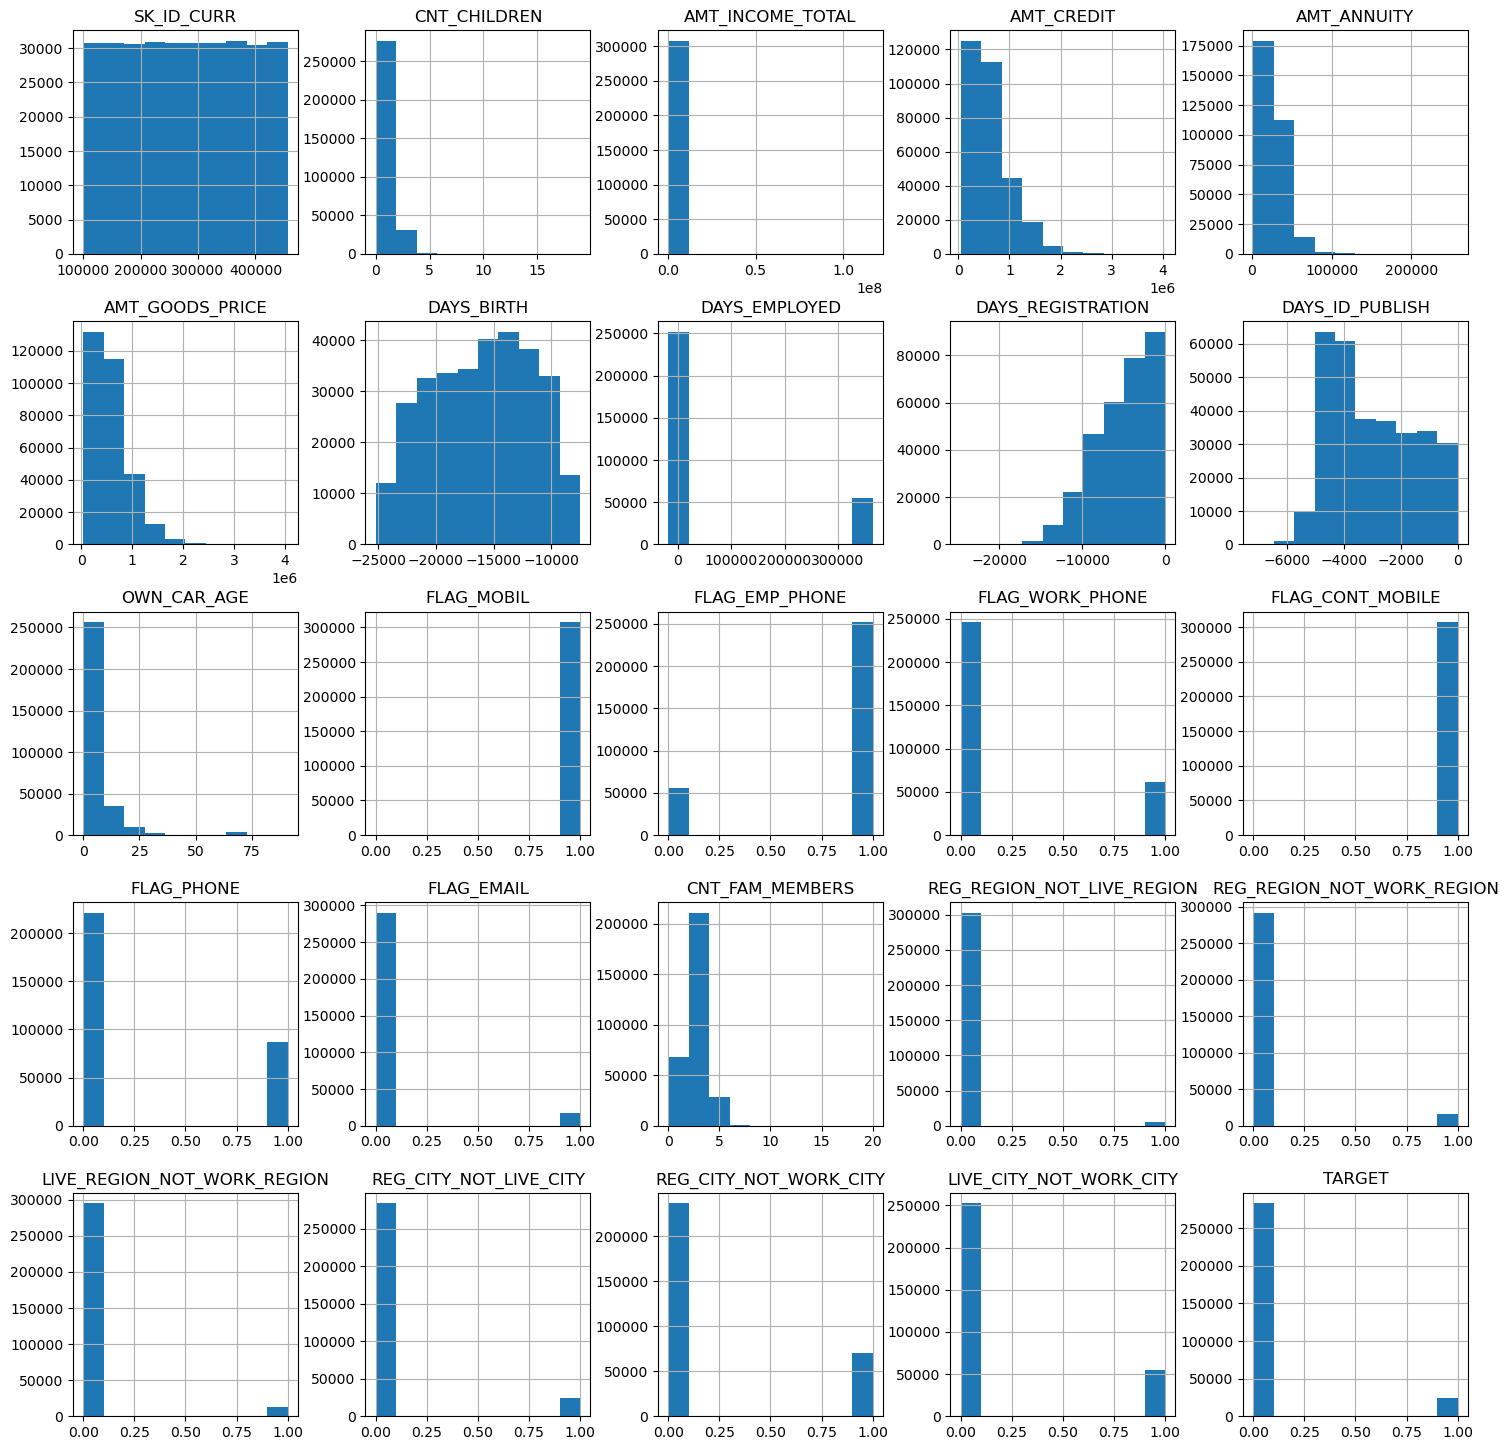

In [89]:
df_loans.hist(figsize=(18,18))

## 2. Outliers

#### the columns that has bigger outliers are AMT_INCOME_TOTAL, AMT_GOODS_PRICE, AMT_CREDIT

In [90]:
# AMT_INCOME_TOTAL
max = df_loans['AMT_INCOME_TOTAL'].max()
print('max', max)
Q1 = df_loans['AMT_INCOME_TOTAL'].quantile(0.25)
print('Q1', Q1)
Q3 = df_loans['AMT_INCOME_TOTAL'].quantile(0.75)
print('Q3', Q3)
IQRage =  Q3 - Q1
print('IQRage', IQRage)
QTop = df_loans['AMT_INCOME_TOTAL'].quantile(0.9)
print('90%', QTop)
QTopAbove = df_loans['AMT_INCOME_TOTAL'].quantile(0.95)
print('95%', QTopAbove)

max 117000000.0
Q1 112500.0
Q3 202500.0
IQRage 90000.0
90% 270000.0
95% 337500.0


In [91]:
below = Q1 - 1 * IQRage
below

22500.0

In [92]:
above = Q3 + 2.5 * IQRage
above

427500.0

In [93]:
df_loans.loc[(df_loans['AMT_INCOME_TOTAL'] < below)] 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET


In [94]:
df_loans.loc[(df_loans['AMT_INCOME_TOTAL'] > above)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
22,100026,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,-11146,-4306,-114.0,-2518,0.0,1,1,0,1,0,0,Sales staff,3.0,0,0,0,0,0,0,Self-employed,0
51,100059,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-18632,-6977,-3904.0,-1937,7.0,1,1,0,1,1,0,Managers,3.0,0,0,0,0,0,0,Services,0
59,100070,Cash loans,M,Y,Y,0,540000.0,1227901.5,46899.0,1129500.0,Unaccompanied,Working,Higher education,Widow,House / apartment,-20544,-2091,-6846.0,-566,2.0,1,1,1,1,0,0,Managers,1.0,0,0,0,0,0,0,Business Entity Type 3,0
142,100164,Cash loans,F,Y,N,1,450000.0,407434.5,43362.0,387000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,-16097,-2630,-110.0,-3852,3.0,1,1,0,1,0,0,Core staff,3.0,0,0,0,0,0,0,Self-employed,0
280,100323,Cash loans,M,Y,Y,0,450000.0,1575000.0,55800.0,1575000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-18213,-2363,-4627.0,-1761,3.0,1,1,1,1,1,0,Managers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307274,455991,Cash loans,M,Y,Y,2,450000.0,495000.0,36148.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Rented apartment,-13456,-3147,-7221.0,-4206,13.0,1,1,0,1,0,1,Managers,4.0,0,0,0,0,0,0,Self-employed,0
307440,456178,Cash loans,F,N,Y,0,440100.0,713889.0,45751.5,661500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-18047,-1886,-3146.0,-1532,0.0,1,1,0,1,1,0,Managers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
307451,456190,Cash loans,M,Y,N,1,450000.0,545040.0,25407.0,450000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,-11523,-2500,-7.0,-2062,13.0,1,1,0,1,0,0,Core staff,3.0,0,0,0,0,0,0,Police,0
307484,456228,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Rented apartment,-12847,-328,-2531.0,-35,1.0,1,1,0,1,1,1,Managers,2.0,0,0,0,0,0,0,Business Entity Type 3,0


#### Removing 5783 rows, which is 1.9% of the data

In [95]:
df_loans_no_outlier = df_loans.loc[(df_loans['AMT_INCOME_TOTAL'] < above)]

In [96]:
len(df_loans_no_outlier)

301250

<Axes: >

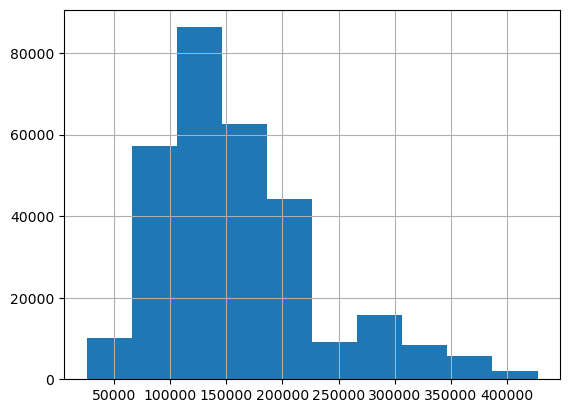

In [97]:
df_loans_no_outlier['AMT_INCOME_TOTAL'].hist()

#### AMT_GOODS_PRICE

In [98]:
max = df_loans_no_outlier['AMT_GOODS_PRICE'].max()
print('max', max)
Q1 = df_loans_no_outlier['AMT_GOODS_PRICE'].quantile(0.25)
print('Q1', Q1)
Q3 = df_loans_no_outlier['AMT_GOODS_PRICE'].quantile(0.75)
print('Q3', Q3)
IQRage =  Q3 - Q1
print('IQRage', IQRage)
QTop = df_loans_no_outlier['AMT_GOODS_PRICE'].quantile(0.9)
print('90%', QTop)
QTopAbove = df_loans_no_outlier['AMT_GOODS_PRICE'].quantile(0.95)
print('95%', QTopAbove)

max 4050000.0
Q1 238500.0
Q3 679500.0
IQRage 441000.0
90% 1039500.0
95% 1237500.0


In [99]:
below = Q1 - 1 * IQRage
below
# since it's negative with even *1, probably not going to set below and adjust the bottom part of the good prices

-202500.0

In [100]:
above = Q3 + 2.5 * IQRage
above

1782000.0

In [101]:
df_loans_no_outlier.loc[(df_loans_no_outlier['AMT_GOODS_PRICE'] > above)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
189,100219,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-11177,-1514,-64.0,-2793,0.0,1,1,0,1,0,1,Core staff,3.0,0,0,0,0,0,0,Business Entity Type 3,0
314,100361,Cash loans,M,N,Y,0,270000.0,1800000.0,62698.5,1800000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-17099,-499,-5508.0,-649,0.0,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Trade: type 7,0
337,100389,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,-14216,-365,-3183.0,-4423,13.0,1,1,1,1,0,0,Core staff,2.0,0,0,0,0,0,0,Self-employed,0
341,100393,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,-14966,-6158,-954.0,-4979,6.0,1,1,0,1,1,0,Core staff,4.0,0,0,0,0,0,0,Police,0
536,100620,Cash loans,F,N,Y,0,225000.0,1800000.0,49500.0,1800000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-17388,-1988,-3305.0,-941,0.0,1,1,1,1,1,0,High skill tech staff,2.0,0,1,1,0,1,1,Industry: type 12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307095,455785,Cash loans,F,Y,Y,0,135000.0,2013840.0,53253.0,1800000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-20296,365243,-5953.0,-1633,3.0,1,0,0,1,0,0,Unknown,2.0,0,0,0,0,0,0,XNA,0
307159,455861,Cash loans,F,N,N,0,247500.0,1800000.0,49500.0,1800000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-18910,-1404,-8890.0,-1264,0.0,1,1,1,1,1,0,Sales staff,2.0,0,0,0,1,1,0,Business Entity Type 3,0
307165,455868,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,1890000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-10595,-3636,-1100.0,-1099,6.0,1,1,0,1,0,0,Accountants,2.0,0,0,0,0,0,0,Business Entity Type 3,0
307214,455922,Cash loans,M,Y,N,2,256500.0,2290743.0,60556.5,2047500.0,"Spouse, partner",Commercial associate,Incomplete higher,Married,House / apartment,-14320,-1310,-1556.0,-4610,33.0,1,1,0,1,0,0,Managers,4.0,0,0,0,0,0,0,Business Entity Type 3,0


#### Removing 2895 rows, which is 1% of the data

In [102]:
df_loans_no_outlier = df_loans_no_outlier.loc[(df_loans_no_outlier['AMT_GOODS_PRICE'] < above)]

In [103]:
len(df_loans_no_outlier)

298342

<Axes: >

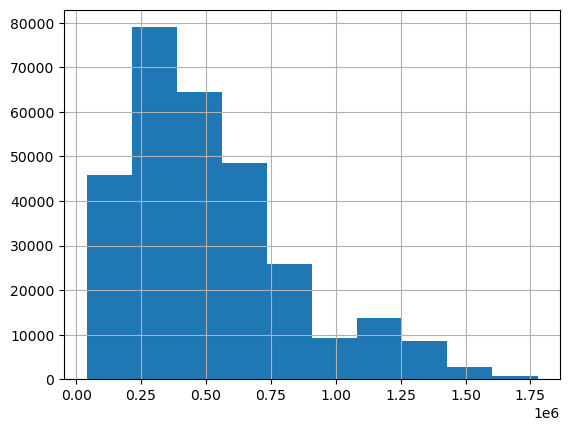

In [104]:
df_loans_no_outlier['AMT_GOODS_PRICE'].hist()

#### AMT_CREDIT

In [105]:
max = df_loans_no_outlier['AMT_CREDIT'].max()
print('max', max)
Q1 = df_loans_no_outlier['AMT_CREDIT'].quantile(0.25)
print('Q1', Q1)
Q3 = df_loans_no_outlier['AMT_CREDIT'].quantile(0.75)
print('Q3', Q3)
IQRage =  Q3 - Q1
print('IQRage', IQRage)
QTop = df_loans_no_outlier['AMT_CREDIT'].quantile(0.9)
print('90%', QTop)
QTopAbove = df_loans_no_outlier['AMT_CREDIT'].quantile(0.95)
print('95%', QTopAbove)

max 2129445.0
Q1 270000.0
Q3 791347.5
IQRage 521347.5
90% 1113840.0
95% 1288350.0


In [106]:
below = Q1 - 1 * IQRage
below
# since it's negative with even *1, probably not going to set below and adjust the bottom part of the credit

-251347.5

In [107]:
above = Q3 + 2 * IQRage
above

1834042.5

In [108]:
df_loans_no_outlier.loc[(df_loans_no_outlier['AMT_CREDIT'] > above)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
1334,101566,Cash loans,F,N,Y,0,364500.0,1963494.0,53995.5,1755000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,-14210,-897,-2568.0,-3307,0.0,1,1,0,1,1,1,Managers,1.0,1,1,0,1,1,0,Business Entity Type 3,0
1662,101947,Cash loans,F,N,Y,0,360000.0,1872517.5,65088.0,1710000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,-20087,-455,-9821.0,-3530,0.0,1,1,1,1,1,0,Unknown,2.0,0,0,0,0,0,0,Other,0
2389,102793,Cash loans,M,Y,N,0,202500.0,1886850.0,52015.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-18675,-158,-6943.0,-2200,6.0,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Housing,0
3263,103806,Cash loans,M,N,Y,0,270000.0,1837629.0,48604.5,1642500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-17594,-491,-6224.0,-1135,0.0,1,1,0,1,0,0,Drivers,2.0,0,0,0,0,0,0,Business Entity Type 2,0
3667,104277,Cash loans,F,N,Y,0,315000.0,1921797.0,66928.5,1755000.0,Unaccompanied,Working,Lower secondary,Married,House / apartment,-18339,-9388,-10323.0,-1843,0.0,1,1,0,1,0,0,Waiters/barmen staff,2.0,0,0,0,0,0,0,Medicine,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304951,453310,Cash loans,F,N,N,0,373500.0,1862802.0,51223.5,1665000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,Office apartment,-15402,-1442,-6315.0,-3179,0.0,1,1,0,1,1,0,Managers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
304960,453320,Cash loans,M,N,Y,0,234000.0,1862802.0,49270.5,1665000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-23345,365243,-616.0,-2900,0.0,1,0,0,1,0,0,Unknown,2.0,0,0,0,0,0,0,XNA,0
306525,455137,Cash loans,F,N,Y,1,247500.0,1943356.5,53572.5,1737000.0,Family,Commercial associate,Higher education,Married,House / apartment,-13556,-4296,-2739.0,-4600,0.0,1,1,0,1,1,0,Managers,3.0,0,0,0,0,0,0,Business Entity Type 3,0
306937,455609,Cash loans,M,Y,Y,0,144000.0,2129445.0,56304.0,1777500.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,-17530,365243,-3320.0,-1083,24.0,1,0,0,1,0,0,Unknown,2.0,0,0,0,0,0,0,XNA,0


#### Removing 406 rows

In [109]:
df_loans_no_outlier = df_loans_no_outlier.loc[(df_loans_no_outlier['AMT_CREDIT'] < above)]

In [110]:
len(df_loans_no_outlier)

297936

<Axes: >

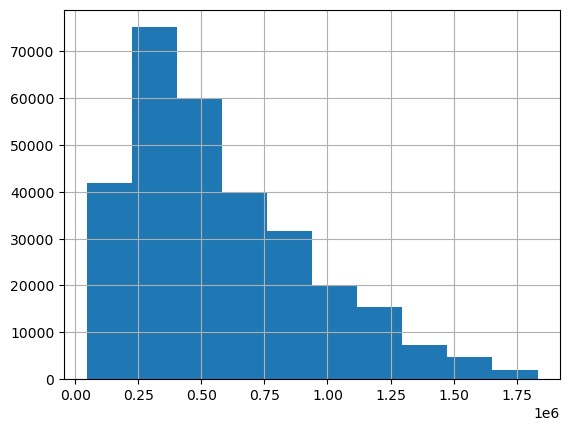

In [111]:
df_loans_no_outlier['AMT_CREDIT'].hist()

#### DAYS_EMPLOYED
#### the data is weird because if I divided by 365, that should mean the years the person is employeed, and over 50k people are employeed over -100 and 100 years? That seems odd.

In [112]:
max = df_loans_no_outlier['DAYS_EMPLOYED'].max()
print('max', max)
Q1 = df_loans_no_outlier['DAYS_EMPLOYED'].quantile(0.25)
print('Q1', Q1)
Q3 = df_loans_no_outlier['DAYS_EMPLOYED'].quantile(0.75)
print('Q3', Q3)
IQRage =  Q3 - Q1
print('IQRage', IQRage)
QTop = df_loans_no_outlier['DAYS_EMPLOYED'].quantile(0.9)
print('90%', QTop)
QTopAbove = df_loans_no_outlier['DAYS_EMPLOYED'].quantile(0.95)
print('95%', QTopAbove)

max 365243
Q1 -2738.0
Q3 -278.0
IQRage 2460.0
90% 365243.0
95% 365243.0


In [113]:
below = Q1 - 15 * IQRage
below/365

-108.59726027397261

In [114]:
above = Q3 + 15 * IQRage
print(above)
above/365

36622.0


100.33424657534246

In [115]:
df_loans_no_outlier.loc[(df_loans_no_outlier['DAYS_EMPLOYED'] > above) | (df_loans_no_outlier['DAYS_EMPLOYED'] < below)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,-7427.0,-3514,0.0,1,0,0,1,0,0,Unknown,2.0,0,0,0,0,0,0,XNA,0
11,100015,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246.0,-2512,0.0,1,0,0,1,1,0,Unknown,2.0,0,0,0,0,0,0,XNA,0
23,100027,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,-9012.0,-3684,0.0,1,0,0,1,1,0,Unknown,2.0,0,0,0,0,0,0,XNA,0
38,100045,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-23920,365243,-9817.0,-4969,0.0,1,0,0,1,1,0,Unknown,2.0,0,0,0,0,0,0,XNA,0
43,100050,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,-23548,365243,-5745.0,-4576,0.0,1,0,0,1,0,0,Unknown,1.0,0,0,0,0,0,0,XNA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22414,365243,-11976.0,-4171,0.0,1,0,0,1,0,0,Unknown,1.0,0,0,0,0,0,0,XNA,0
307483,456227,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,-24911,365243,-11211.0,-4213,0.0,1,0,0,1,0,0,Unknown,1.0,0,0,0,0,0,0,XNA,0
307487,456231,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,-5485.0,-4115,0.0,1,0,0,1,0,0,Unknown,2.0,0,0,0,0,0,0,XNA,0
307505,456249,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,-7369.0,-2357,0.0,1,0,0,1,1,0,Unknown,1.0,0,0,0,0,0,0,XNA,0


#### I am not going to remove these rows because professor says not to remove over 7% of the data, but I am suspecting this might be the reason why my model's prediction accurancy is only 57%.

#### final loan number after removing outliers is 297936, we removed 3.11% of the data 

## 3. Who are our clients? (the type of employment, age, income)
#### Most of our clients' job is unknown, otherwise 1st known job is laborers, then sales staff, then core staff.
#### Most of our clients' age is between 30-40, then 40-50, and 50-60.
#### Most of our clients' income is between 50-200k.

#### employment graph

In [116]:
df_employment = df_loans_no_outlier.groupby(['OCCUPATION_TYPE'],as_index=False)['SK_ID_CURR'].count().sort_values(by='SK_ID_CURR') 
df_employment

,OCCUPATION_TYPE,SK_ID_CURR
7,IT staff,479
5,HR staff,533
13,Realty agents,730
15,Secretaries,1271
18,Waiters/barmen staff,1339
9,Low-skill Laborers,2088
12,Private service staff,2566
1,Cleaning staff,4630
2,Cooking staff,5903
16,Security staff,6656


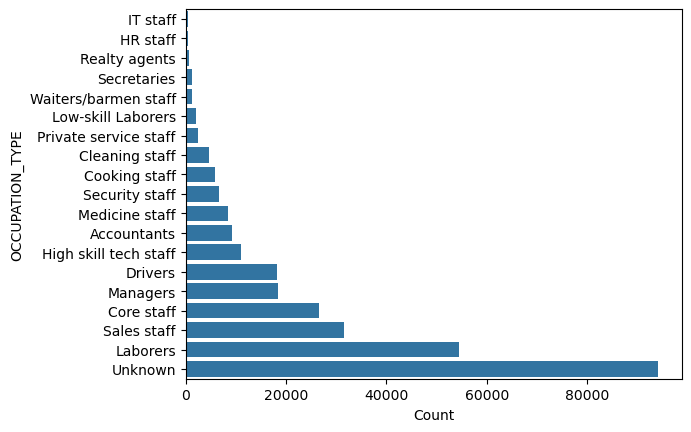

In [117]:
sb.barplot(y = df_employment['OCCUPATION_TYPE'], x = df_employment['SK_ID_CURR'])
plt.xlabel('Count')
plt.show()

#### Age graph

In [118]:
df_loans_no_outlier['DAYS_BIRTH'] = (- df_loans_no_outlier['DAYS_BIRTH']/365).astype(int)
# df_age = df_loans_no_outlier.groupby(['DAYS_BIRTH'],as_index=False)['SK_ID_CURR'].count().sort_values(by='SK_ID_CURR') 

<Axes: >

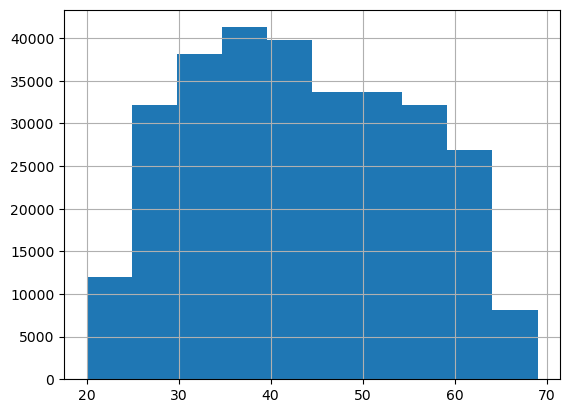

In [119]:
df_loans_no_outlier['DAYS_BIRTH'].hist()

In [120]:
df_loans_no_outlier['DAYS_BIRTH'].min()

20

In [121]:
df_loans_no_outlier['agebin'] = pd.cut(df_loans_no_outlier['DAYS_BIRTH'], bins = [20, 30, 40,50,60,70], labels=['20-30','30-40','40-50','50-60','60-70'])

In [122]:
(df_loans_no_outlier[['agebin', 'DAYS_BIRTH']])

,agebin,DAYS_BIRTH
0,20-30,25
1,40-50,45
2,50-60,52
3,50-60,52
4,50-60,54
...,...,...
307506,20-30,25
307507,50-60,56
307508,40-50,41
307509,30-40,32


<BarContainer object of 5 artists>

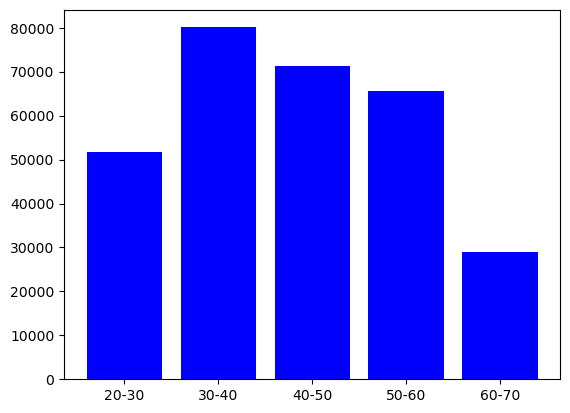

In [123]:
df_age =df_loans_no_outlier.groupby(['agebin'],as_index=False, observed=False)['DAYS_BIRTH'].count()
plt.bar(df_age['agebin'], df_age['DAYS_BIRTH'], color = 'b')

#### Income graph

In [124]:
df_loans_no_outlier['AMT_INCOME_TOTAL'].max()

427050.0

In [125]:
df_loans_no_outlier['wagebin'] = pd.cut(df_loans_no_outlier['AMT_INCOME_TOTAL'], bins = [0, 50000, 100000, 150000,200000,250000,300000,350000,400000, 200000000], labels=['0k-50k', '50k-100k','100k-150k','150k-200k','200k-250k', '250k-300k','300k-350k', '350k-400k', '400k+'])

<BarContainer object of 9 artists>

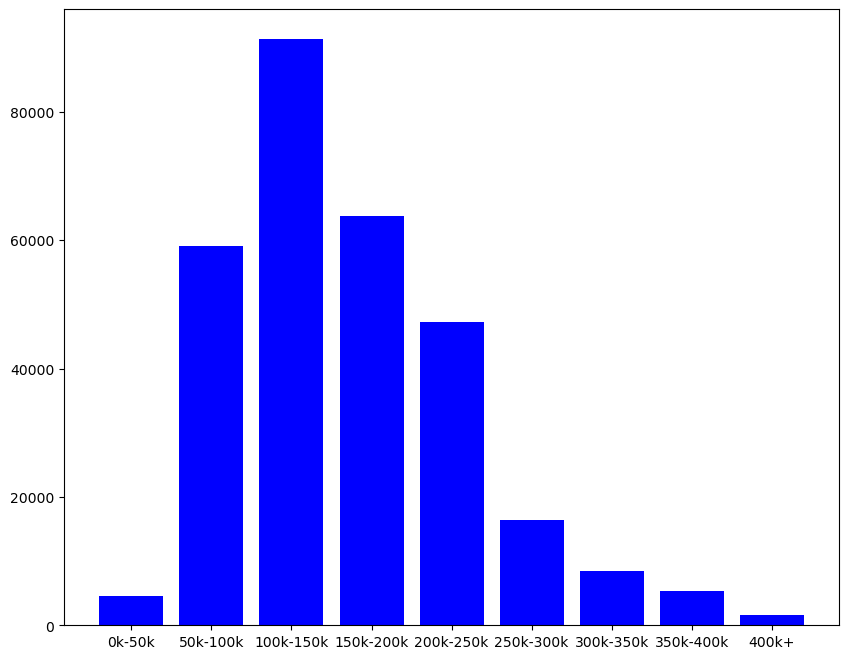

In [126]:
df_wage =df_loans_no_outlier.groupby(['wagebin'],as_index=False, observed=False)['AMT_INCOME_TOTAL'].count()
plt.figure(figsize=(10, 8)) 
plt.bar(df_wage['wagebin'], df_wage['AMT_INCOME_TOTAL'], color = 'b')

### How much (total) do they have out in loans? How much are in default/late? What percentage of the business are default and late?)

#### ABC Bank has 307511 loans and total loan amount is 

In [127]:
original_loans['AMT_CREDIT'].sum()

184207084195.5

#### The number of loans that are in default/late is 

In [128]:
len(original_loans[(original_loans['TARGET'] == 1)])

24825

#### The default/late loan percentage is around 0.08%

In [129]:
len(original_loans[(original_loans['TARGET'] == 1)]) / len(original_loans)

0.08072881945686496

## 4. Who defaults or has problems replaying loans?

#### Defaulted clients are mostly doing Low-skill Laborers, Drivers, and Waiters/barmen staff	
#### Defaulted clients are mostly younger, the younger they are, the more likely they go default
#### Top 3 defaulted clients has wages between 50k-200k, but all groups have about the same chance to go default, so salary is probably not a significant factor to default.

In [130]:
df_defaults = df_loans_no_outlier[(df_loans_no_outlier['TARGET'] == 1)]
# df_defaults_original = original_loans[(original_loans['TARGET'] == 1)]
# df_employment = df_defaults_original.groupby(['OCCUPATION_TYPE'],as_index=False)['SK_ID_CURR'].count().sort_values(by='SK_ID_CURR') 
df_employment_defaults = df_defaults.groupby(['OCCUPATION_TYPE'],as_index=False)['SK_ID_CURR'].count()

In [131]:
df_employment_defaults['SK_ID_CURR'] = df_employment_defaults['SK_ID_CURR']/df_employment['SK_ID_CURR']
df_employment_defaults = df_employment_defaults.sort_values(by='SK_ID_CURR')
df_employment_defaults

,OCCUPATION_TYPE,SK_ID_CURR
0,Accountants,0.049632
5,HR staff,0.061914
6,High skill tech staff,0.062392
10,Managers,0.062405
3,Core staff,0.063849
17,Unknown,0.065787
12,Private service staff,0.067420
11,Medicine staff,0.067469
7,IT staff,0.068894
15,Secretaries,0.071597


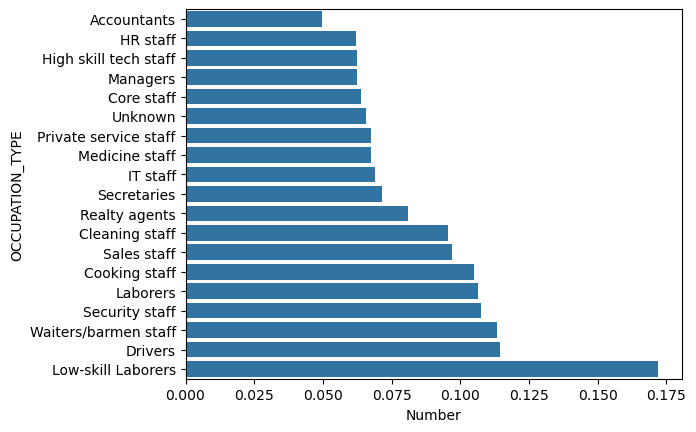

In [132]:
sb.barplot(y = df_employment_defaults['OCCUPATION_TYPE'], x = df_employment_defaults['SK_ID_CURR'])
plt.xlabel('Number')
plt.show()

<BarContainer object of 5 artists>

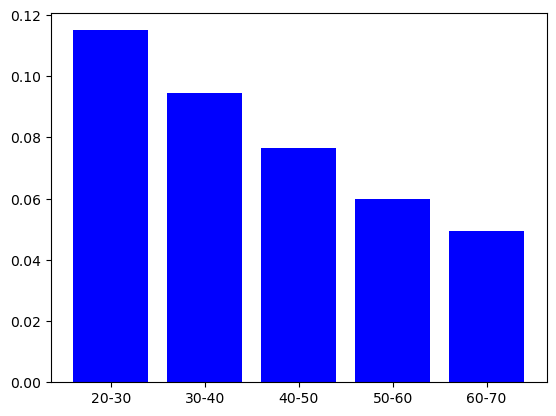

In [133]:
df_age_defaults = df_defaults.groupby(['agebin'],as_index=False,observed=False)['DAYS_BIRTH'].count()
df_age_defaults['DAYS_BIRTH'] = df_age_defaults['DAYS_BIRTH']/df_age['DAYS_BIRTH']
plt.bar(df_age_defaults['agebin'], df_age_defaults['DAYS_BIRTH'], color = 'b')

<BarContainer object of 9 artists>

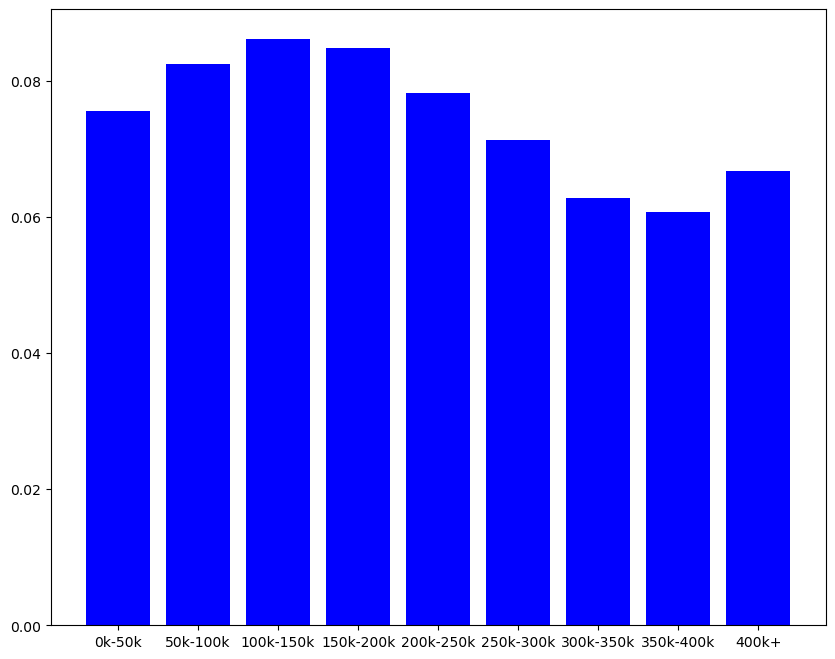

In [134]:
df_wage_defaults = df_defaults.groupby(['wagebin'],as_index=False,observed=False)['AMT_INCOME_TOTAL'].count()
df_wage_defaults['AMT_INCOME_TOTAL'] = df_wage_defaults['AMT_INCOME_TOTAL']/df_wage['AMT_INCOME_TOTAL']
plt.figure(figsize=(10, 8)) 
plt.bar(df_wage_defaults['wagebin'], df_wage_defaults['AMT_INCOME_TOTAL'], color = 'b')

## 5. Prepare the data for a regression analysis
#### 11 columns need to be translate into ordinal data

In [135]:
df_loans_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297936 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   297936 non-null  int64   
 1   NAME_CONTRACT_TYPE           297936 non-null  object  
 2   CODE_GENDER                  297936 non-null  object  
 3   FLAG_OWN_CAR                 297936 non-null  object  
 4   FLAG_OWN_REALTY              297936 non-null  object  
 5   CNT_CHILDREN                 297936 non-null  int64   
 6   AMT_INCOME_TOTAL             297936 non-null  float64 
 7   AMT_CREDIT                   297936 non-null  float64 
 8   AMT_ANNUITY                  297936 non-null  float64 
 9   AMT_GOODS_PRICE              297936 non-null  float64 
 10  NAME_TYPE_SUITE              297936 non-null  object  
 11  NAME_INCOME_TYPE             297936 non-null  object  
 12  NAME_EDUCATION_TYPE          297936 non-null  obj

In [136]:
df_loans_no_outlier['NAME_CONTRACT_TYPE_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_CONTRACT_TYPE'] =='Revolving loans', 'NAME_CONTRACT_TYPE_NUM'] =1
df_loans_no_outlier.drop('NAME_CONTRACT_TYPE', axis=1, inplace=True)

In [137]:
df_loans_no_outlier['CODE_GENDER_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['CODE_GENDER'] =='M', 'CODE_GENDER_NUM'] =1
df_loans_no_outlier.loc[df_loans_no_outlier['CODE_GENDER'] =='XNA', 'CODE_GENDER_NUM'] =2
df_loans_no_outlier.drop('CODE_GENDER', axis=1, inplace=True)

In [138]:
df_loans_no_outlier['FLAG_OWN_CAR_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['FLAG_OWN_CAR'] =='Y', 'FLAG_OWN_CAR_NUM'] =1
df_loans_no_outlier.drop('FLAG_OWN_CAR', axis=1, inplace=True)

In [139]:
df_loans_no_outlier['FLAG_OWN_REALTY_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['FLAG_OWN_REALTY'] =='Y', 'FLAG_OWN_REALTY_NUM'] =1
df_loans_no_outlier.drop('FLAG_OWN_REALTY', axis=1, inplace=True)

In [140]:
unique_values = df_loans_no_outlier['NAME_TYPE_SUITE'].unique()
unique_values

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [141]:
df_loans_no_outlier['NAME_TYPE_SUITE_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_TYPE_SUITE'] =='Family', 'NAME_TYPE_SUITE_NUM'] =1
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_TYPE_SUITE'] =='Spouse, partner', 'NAME_TYPE_SUITE_NUM'] =2
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_TYPE_SUITE'] =='Children', 'NAME_TYPE_SUITE_NUM'] =3
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_TYPE_SUITE'] =='Other_A', 'NAME_TYPE_SUITE_NUM'] =4
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_TYPE_SUITE'] =='Other_B', 'NAME_TYPE_SUITE_NUM'] =5
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_TYPE_SUITE'] =='Group of people', 'NAME_TYPE_SUITE_NUM'] =6
df_loans_no_outlier.drop('NAME_TYPE_SUITE', axis=1, inplace=True)

In [142]:
unique_values = df_loans_no_outlier['NAME_INCOME_TYPE'].unique()
unique_values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Maternity leave', 'Businessman'],
      dtype=object)

In [143]:
df_loans_no_outlier['NAME_INCOME_TYPE_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_INCOME_TYPE'] =='State servant', 'NAME_INCOME_TYPE_NUM'] =1
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_INCOME_TYPE'] =='Spouse, partner', 'NAME_INCOME_TYPE_NUM'] =2
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_INCOME_TYPE'] =='Children', 'NAME_INCOME_TYPE_NUM'] =3
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_INCOME_TYPE'] =='Other_A', 'NAME_INCOME_TYPE_NUM'] =4
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_INCOME_TYPE'] =='Other_B', 'NAME_INCOME_TYPE_NUM'] =5
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_INCOME_TYPE'] =='Group of people', 'NAME_INCOME_TYPE_NUM'] =6
df_loans_no_outlier.drop('NAME_INCOME_TYPE', axis=1, inplace=True)

In [144]:
unique_values = df_loans_no_outlier['NAME_EDUCATION_TYPE'].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [145]:
df_loans_no_outlier['NAME_EDUCATION_TYPE_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_EDUCATION_TYPE'] =='Higher education', 'NAME_EDUCATION_TYPE_NUM'] =1
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_EDUCATION_TYPE'] =='Incomplete higher', 'NAME_EDUCATION_TYPE_NUM'] =2
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_EDUCATION_TYPE'] =='Lower secondary', 'NAME_EDUCATION_TYPE_NUM'] =3
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_EDUCATION_TYPE'] =='Academic degree', 'NAME_EDUCATION_TYPE_NUM'] =4
df_loans_no_outlier.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)

In [146]:
unique_values = df_loans_no_outlier['NAME_FAMILY_STATUS'].unique()
unique_values

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [147]:
df_loans_no_outlier['NAME_FAMILY_STATUS_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_FAMILY_STATUS'] =='Married', 'NAME_FAMILY_STATUS_NUM'] =1
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_FAMILY_STATUS'] =='Civil marriage', 'NAME_FAMILY_STATUS_NUM'] =2
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_FAMILY_STATUS'] =='Widow', 'NAME_FAMILY_STATUS_NUM'] =3
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_FAMILY_STATUS'] =='Separated', 'NAME_FAMILY_STATUS_NUM'] =4
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_FAMILY_STATUS'] =='Unknown', 'NAME_FAMILY_STATUS_NUM'] =5
df_loans_no_outlier.drop('NAME_FAMILY_STATUS', axis=1, inplace=True)

In [148]:
unique_values = df_loans_no_outlier['NAME_HOUSING_TYPE'].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [149]:
df_loans_no_outlier['NAME_HOUSING_TYPE_NUM'] =0
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_HOUSING_TYPE'] =='Rented apartment', 'NAME_HOUSING_TYPE_NUM'] =1
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_HOUSING_TYPE'] =='With parents', 'NAME_HOUSING_TYPE_NUM'] =2
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_HOUSING_TYPE'] =='Municipal apartment', 'NAME_HOUSING_TYPE_NUM'] =3
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_HOUSING_TYPE'] =='Office apartment', 'NAME_HOUSING_TYPE_NUM'] =4
df_loans_no_outlier.loc[df_loans_no_outlier['NAME_HOUSING_TYPE'] =='Co-op apartment', 'NAME_HOUSING_TYPE_NUM'] =5
df_loans_no_outlier.drop('NAME_HOUSING_TYPE', axis=1, inplace=True)

In [150]:
unique_values = df_loans_no_outlier['OCCUPATION_TYPE'].unique()
unique_values

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Unknown',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [151]:
df_loans_no_outlier['OCCUPATION_TYPE_NUM'] =0
for index, val in enumerate(unique_values):
    print(val, index)
    df_loans_no_outlier.loc[df_loans_no_outlier['OCCUPATION_TYPE'] ==val, 'OCCUPATION_TYPE_NUM'] =index

df_loans_no_outlier.drop('OCCUPATION_TYPE', axis=1, inplace=True)

Laborers 0
Core staff 1
Accountants 2
Managers 3
Unknown 4
Drivers 5
Sales staff 6
Cleaning staff 7
Cooking staff 8
Private service staff 9
Medicine staff 10
Security staff 11
High skill tech staff 12
Waiters/barmen staff 13
Low-skill Laborers 14
Realty agents 15
Secretaries 16
IT staff 17
HR staff 18


In [152]:
unique_values = df_loans_no_outlier['ORGANIZATION_TYPE'].unique()
len(unique_values)
unique_values

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [153]:
df_loans_no_outlier['ORGANIZATION_TYPE_NUM'] =0
for index, val in enumerate(unique_values):
    print(val, index)
    df_loans_no_outlier.loc[df_loans_no_outlier['ORGANIZATION_TYPE'] ==val, 'ORGANIZATION_TYPE_NUM'] =index

df_loans_no_outlier.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

Business Entity Type 3 0
School 1
Government 2
Religion 3
Other 4
XNA 5
Electricity 6
Medicine 7
Business Entity Type 2 8
Self-employed 9
Transport: type 2 10
Construction 11
Housing 12
Kindergarten 13
Trade: type 7 14
Industry: type 11 15
Military 16
Services 17
Security Ministries 18
Transport: type 4 19
Industry: type 1 20
Emergency 21
Security 22
Trade: type 2 23
University 24
Transport: type 3 25
Police 26
Business Entity Type 1 27
Postal 28
Industry: type 4 29
Agriculture 30
Restaurant 31
Culture 32
Hotel 33
Industry: type 7 34
Trade: type 3 35
Industry: type 3 36
Bank 37
Industry: type 9 38
Insurance 39
Trade: type 6 40
Industry: type 2 41
Transport: type 1 42
Industry: type 12 43
Mobile 44
Trade: type 1 45
Industry: type 5 46
Industry: type 10 47
Legal Services 48
Advertising 49
Trade: type 5 50
Cleaning 51
Industry: type 13 52
Trade: type 4 53
Telecom 54
Industry: type 8 55
Realtor 56
Industry: type 6 57


In [154]:
df_loans_no_outlier.drop('agebin', axis=1, inplace=True)
df_loans_no_outlier.drop('wagebin', axis=1, inplace=True)

In [155]:
df_loans_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297936 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   297936 non-null  int64  
 1   CNT_CHILDREN                 297936 non-null  int64  
 2   AMT_INCOME_TOTAL             297936 non-null  float64
 3   AMT_CREDIT                   297936 non-null  float64
 4   AMT_ANNUITY                  297936 non-null  float64
 5   AMT_GOODS_PRICE              297936 non-null  float64
 6   DAYS_BIRTH                   297936 non-null  int64  
 7   DAYS_EMPLOYED                297936 non-null  int64  
 8   DAYS_REGISTRATION            297936 non-null  float64
 9   DAYS_ID_PUBLISH              297936 non-null  int64  
 10  OWN_CAR_AGE                  297936 non-null  float64
 11  FLAG_MOBIL                   297936 non-null  int64  
 12  FLAG_EMP_PHONE               297936 non-null  int64  
 13  FLAG

In [156]:
df_loans_no_outlier.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,NAME_CONTRACT_TYPE_NUM,CODE_GENDER_NUM,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,NAME_TYPE_SUITE_NUM,NAME_INCOME_TYPE_NUM,NAME_EDUCATION_TYPE_NUM,NAME_FAMILY_STATUS_NUM,NAME_HOUSING_TYPE_NUM,OCCUPATION_TYPE_NUM,ORGANIZATION_TYPE_NUM
SK_ID_CURR,1.000000,-0.000718,0.001950,-0.001110,-0.000193,-0.001045,0.001216,0.001352,-0.000914,-0.000473,0.001496,0.002849,-0.001321,-0.000586,0.002052,0.002968,0.000110,-0.002701,-0.000258,0.000553,0.002322,-0.001792,-0.001482,0.000106,-0.001885,0.002261,-0.000415,0.001603,0.001115,0.000242,0.001818,0.002270,0.000441,0.001045,0.001576,0.001340
CNT_CHILDREN,-0.000718,1.000000,0.025262,0.002563,0.022285,-0.002001,-0.332775,-0.242044,0.184787,-0.026246,0.069299,0.001056,0.242931,0.057515,0.000607,-0.029783,0.020964,0.878474,-0.013528,0.008484,0.015061,0.020165,0.072239,0.071212,0.019785,0.031176,0.043863,0.101828,-0.002694,0.027864,0.047440,0.020084,-0.017385,0.018127,-0.019428,0.054241
AMT_INCOME_TOTAL,0.001950,0.025262,1.000000,0.368673,0.447104,0.372487,-0.081277,-0.176560,0.071310,0.029323,0.069418,0.000843,0.176039,-0.053092,-0.008459,-0.010167,0.091869,0.031850,0.076938,0.158719,0.147700,0.016928,0.036409,0.038025,-0.017193,-0.041271,0.199918,0.207641,0.012229,-0.040490,0.039063,0.137155,-0.020726,0.000804,-0.044862,0.025025
AMT_CREDIT,-0.001110,0.002563,0.368673,1.000000,0.755106,0.984822,0.057843,-0.062633,0.002922,-0.006283,0.030800,0.001487,0.061352,-0.025670,0.025730,0.018646,0.004721,0.064473,0.015602,0.038110,0.041363,-0.027325,-0.014031,0.005987,-0.023470,-0.241397,0.012466,0.100240,-0.030354,0.018272,0.043725,0.038255,-0.028960,-0.026123,-0.011015,-0.000748
AMT_ANNUITY,-0.000193,0.022285,0.447104,0.755106,1.000000,0.759217,-0.014027,-0.104638,0.034769,0.014186,0.046839,0.000048,0.103949,-0.027400,0.025513,0.002985,0.061458,0.077682,0.034495,0.069482,0.066171,-0.004099,0.008660,0.017264,-0.004128,-0.271351,0.071468,0.128160,0.001378,0.017470,0.029504,0.059601,-0.052818,-0.013773,-0.017020,-0.000651
AMT_GOODS_PRICE,-0.001045,-0.002001,0.372487,0.984822,0.759217,1.000000,0.056648,-0.060148,0.004557,-0.009107,0.028990,0.001451,0.058827,-0.003192,0.022852,0.035314,0.004661,0.062491,0.017532,0.039172,0.041520,-0.028131,-0.015861,0.004462,-0.033554,-0.206784,0.012846,0.105082,-0.037058,0.016032,0.043170,0.046746,-0.031891,-0.029875,-0.012006,0.000405
DAYS_BIRTH,0.001216,-0.332775,-0.081277,0.057843,-0.014027,0.056648,1.000000,0.620255,-0.333181,-0.278620,-0.085571,0.003117,-0.624227,-0.174272,0.013837,0.042707,-0.089742,-0.280707,-0.065318,-0.095863,-0.069918,-0.181449,-0.245425,-0.161290,-0.079439,-0.087520,-0.148656,-0.131286,0.119322,0.008730,-0.061996,-0.144476,0.200603,-0.130277,0.009454,-0.151287
DAYS_EMPLOYED,0.001352,-0.242044,-0.176560,-0.062633,-0.104638,-0.060148,0.620255,1.000000,-0.211295,-0.276437,-0.088344,0.000840,-0.999766,-0.236455,0.012233,0.016449,-0.061260,-0.235295,-0.035136,-0.105412,-0.093904,-0.091821,-0.257910,-0.220783,-0.046300,-0.055275,-0.154714,-0.152178,0.069025,0.018320,-0.131515,-0.070110,0.119466,-0.064717,-0.023384,-0.198756
DAYS_REGISTRATION,-0.000914,0.184787,0.071310,0.002922,0.034769,0.004557,-0.333181,-0.211295,1.000000,0.103448,0.045458,-0.000111,0.213420,0.059545,-0.002974,-0.074812,0.033650,0.174547,0.028067,0.035094,0.025808,0.065418,0.101322,0.073537,0.043120,0.020334,0.075981,0.086171,-0.024523,-0.002484,0.029260,0.072231,-0.058349,-0.004771,-0.007701,0.053057
DAYS_ID_PUBLISH,-0.000473,-0.026246,0.029323,-0.006283,0.014186,-0.009107,-0.278620,-0.276437,0.103448,1.000000,0.012613,-0.002331,0.277679,0.047299,-0.002542,-0.038633,0.027995,-0.019257,0.03

<Axes: >

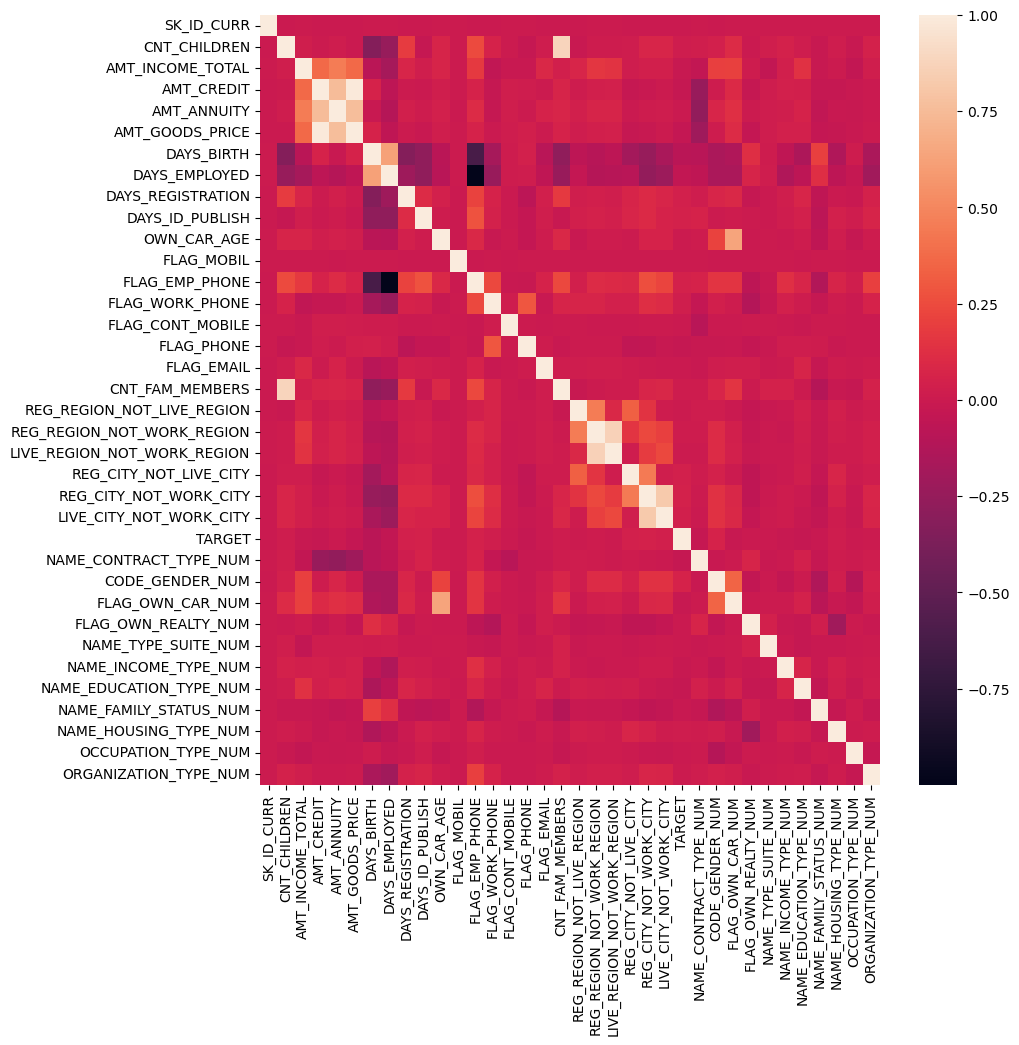

In [183]:
corrMatrix = df_loans_no_outlier.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corrMatrix)

## 6. Regression analysis

In [157]:
df_loans_no_outlier['TARGET'].value_counts()

TARGET
0    273595
1     24341
Name: count, dtype: int64

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>],
       [<Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>],
       [<Axes: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>,
        <Axes: titl

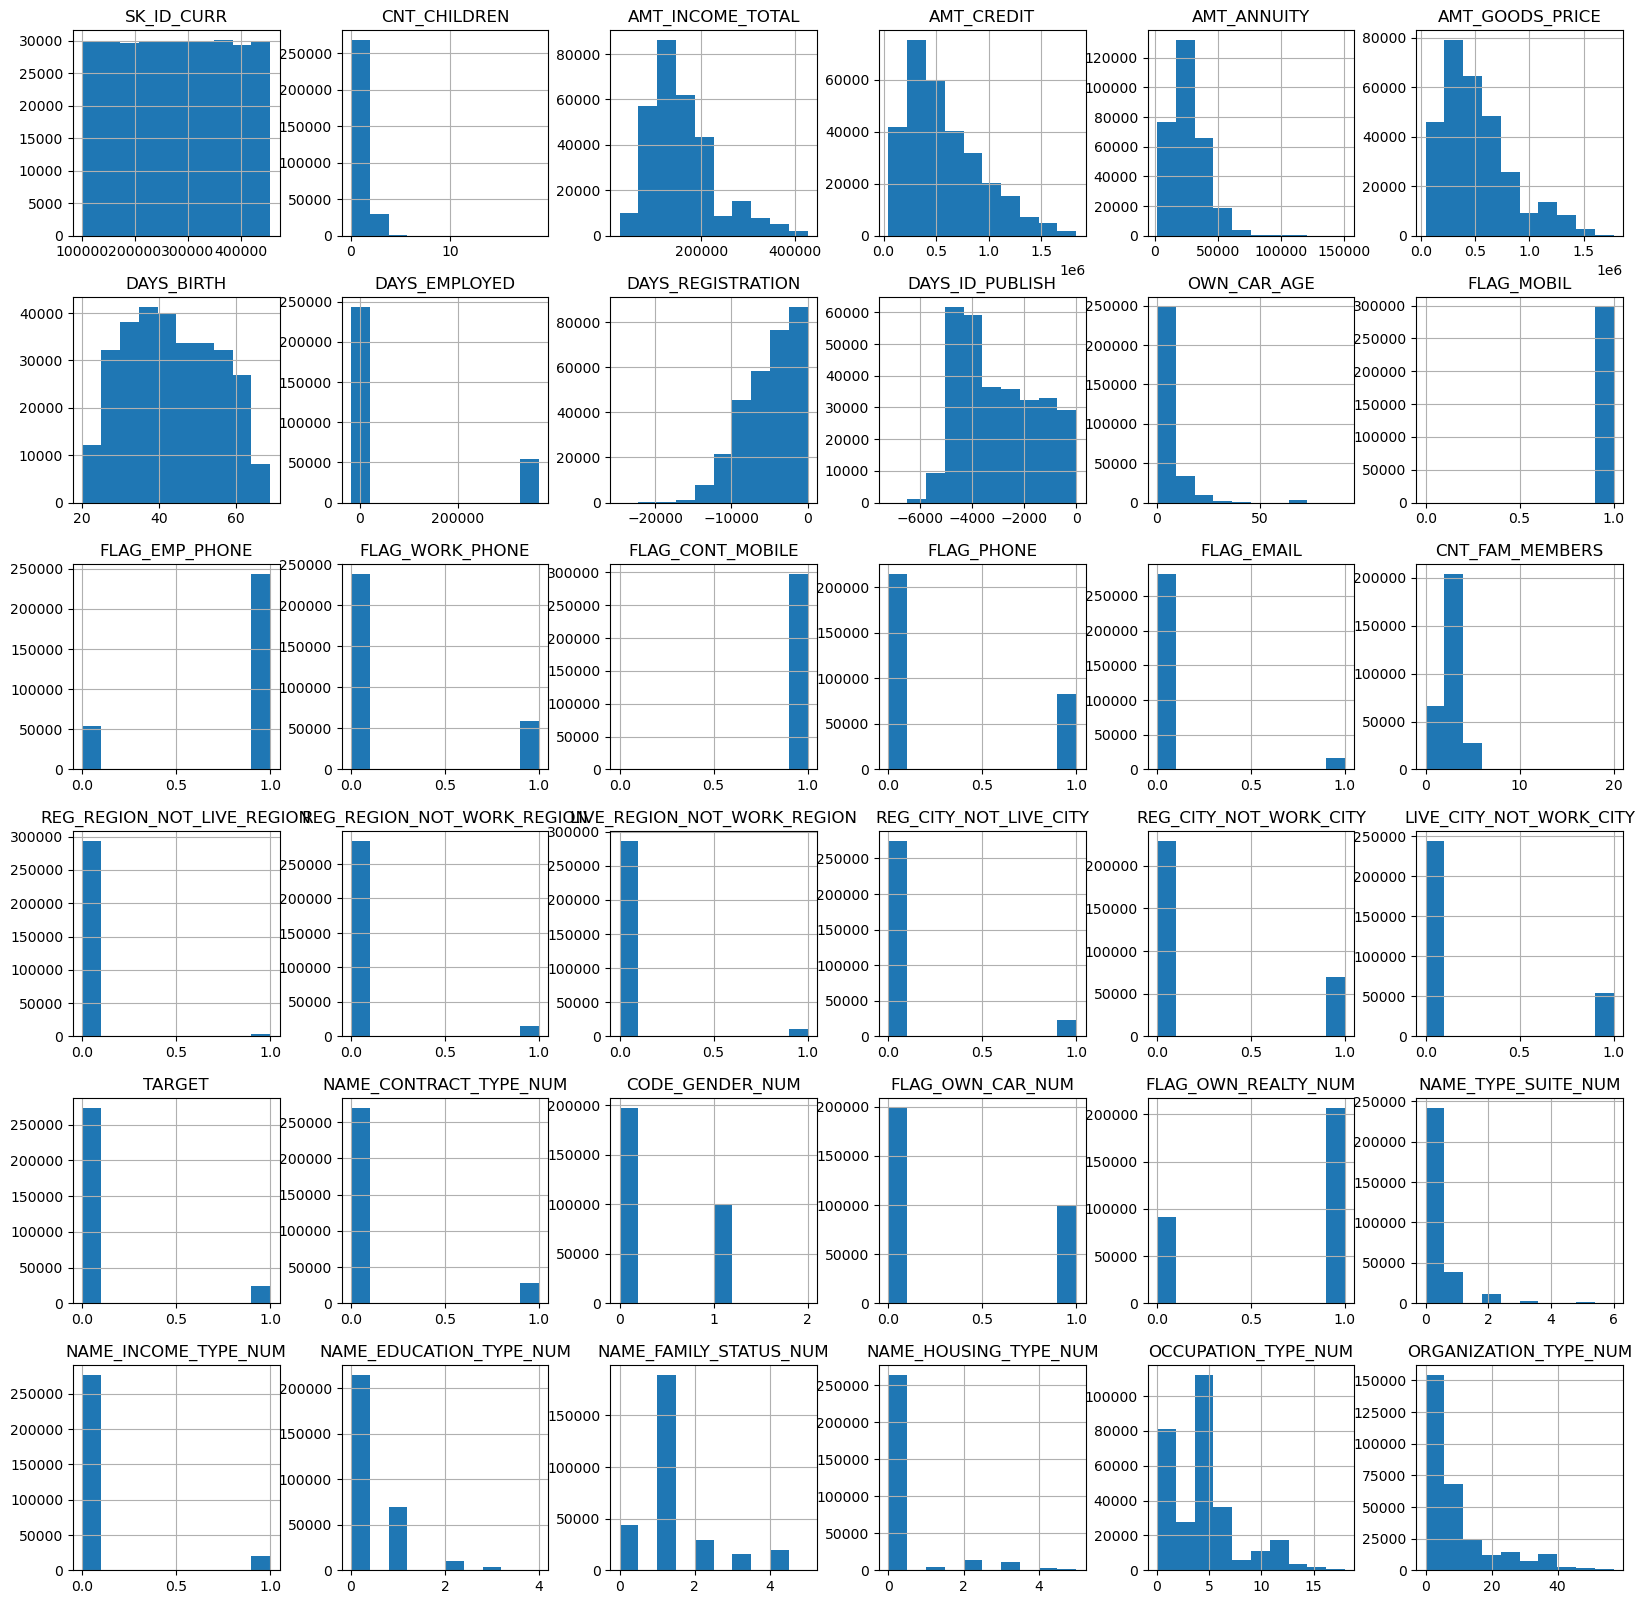

In [158]:
df_loans_no_outlier.hist(figsize=(20,20))

In [159]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#To Split our Data set into training and test data
from sklearn.model_selection import train_test_split
# To calculate accuracy measures and confusion matrix
from sklearn import metrics
import statsmodels.api as sm

In [160]:
# could have use get_dummies to clean up the columns
df_loans_no_outlier_prep = pd.get_dummies(df_loans_no_outlier)

In [161]:
df_loans_no_outlier_prep

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,NAME_CONTRACT_TYPE_NUM,CODE_GENDER_NUM,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,NAME_TYPE_SUITE_NUM,NAME_INCOME_TYPE_NUM,NAME_EDUCATION_TYPE_NUM,NAME_FAMILY_STATUS_NUM,NAME_HOUSING_TYPE_NUM,OCCUPATION_TYPE_NUM,ORGANIZATION_TYPE_NUM
0,100002,0,202500.0,406597.5,24700.5,351000.0,25,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,1.0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,45,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1
2,100004,0,67500.0,135000.0,6750.0,135000.0,52,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,2
3,100006,0,135000.0,312682.5,29686.5,297000.0,52,-3039,-9833.0,-2437,0.0,1,1,0,1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,54,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,1.0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,25,-236,-8456.0,-1982,0.0,1,1,0,1,0,0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,2,6,17
307507,456252,0,72000.0,269550.0,12001.5,225000.0,56,365243,-4388.0,-4090,0.0,1,0,0,1,1,0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,4,5
307508,456253,0,153000.0,677664.0,29979.0,585000.0,41,-7921,-6737.0,-5150,0.0,1,1,0,1,0,1,1.0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,4,0,3,1
307509,456254,0,171000.0,370107.0,20205.0,319500.0,32,-4786,-2562.0,-931,0.0,1,1,0,1,0,0,2.0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,27


In [162]:
X= df_loans_no_outlier_prep

In [163]:
X= X.drop(['TARGET'],axis=1)

In [164]:
y = df_loans_no_outlier_prep['TARGET']

In [165]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.4, random_state=42)

In [166]:
X_train.shape

(178761, 35)

In [167]:
y_train.shape

(178761,)

In [168]:
X_test.shape

(119175, 35)

In [169]:
# lr = LogisticRegression() => this one the balance score is only 0.5, while predict score is 91%
lr=LogisticRegression(class_weight='balanced',solver='lbfgs')

In [170]:
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [171]:
# lr.fit(X,y)

In [172]:
lr.score(X,y)

0.5772649159551044

In [173]:
pred_train = lr.predict(X_train)

In [174]:
lr.score(X_test,y_test)

0.5771260750996434

In [175]:
pred_test = lr.predict(X_test)

In [176]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test,pred_test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes     63279    46218
actual:no       4178     5500


In [177]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_train, pred_train)

0.5761839207806193

In [178]:
balanced_accuracy_score(y_test, pred_test)

0.5731027396929478

#### Our regression model has a prediction accurancy rate of 57.31%

In [179]:
from sklearn.metrics import accuracy_score, precision_score

In [180]:
accuracy = accuracy_score(y_test, y_pred)

NameError: name 'y_pred' is not defined